# Solving the RBC model

In [144]:
using Dolo


The RBC model is defined in a YAML file which we can read locally.

In [145]:
filename= "../models/rbc.yaml"

readlines(filename)

87-element Vector{String}:
 "name: Real Business Cycle"
 ""
 "model_type: dtcc"
 ""
 "symbols:"
 ""
 "   exogenous: [z]"
 "   states: [k]"
 "   controls: [n, i]"
 "   expectations: [m]"
 ⋮
 ""
 "options:"
 "    grid: !Cartesian"
 "        orders: [50]"
 ""
 "test: |"
 "    chi*n^eta*c^sigma - (1-alpha)*y/n           | 0 <= n <= inf"
 "    1 - beta*(c/c(1))^(sigma)*(1-delta+rk(1))  | 0 <= i <= inf"
 "    "


yaml_import(filename) reads the YAML file and generates a model object.

In [146]:
model = yaml_import(filename)

[0.000256]


Model

The model file already has values for steady-state variables stated in the calibration section so we can go ahead and check that they are correct by computing the model equations at the steady state.

In [147]:
residuals(model)

Dict{Symbol, Vector{Float64}} with 2 entries:
  :transition => [0.0]
  :arbitrage  => [-4.44089e-16, 0.0]

Printing the model also lets us have a look at all the model equations and check that all residual errors are 0 at the steady-state, but with less display prescision.

In [148]:
Base.show(model)

Model

Next we compute a solution to the model using a first order perturbation method (see the source for the approximate_controls function). The result is a decsion rule object. By decision rule we refer to any object that is callable and maps states to decisions. This particular decision rule object is a TaylorExpansion (see the source for the TaylorExpansion class).

In [149]:
dr_pert = perturb(model)

Perturbation Results
 * Decision Rule type: Dolo.BiTaylorExpansion{2}
 * stable < true
 * determined < true



We now compute the global solution (see the source for the time_iteration function). It returns a decision rule object of type SmolyakGrid (see the source for the SmolyakGrid class).

In [141]:
dr_global = time_iteration(model)

------------------------------------------------------------------
It    ϵₙ              ηₙ=|xₙ-xₙ₋₁|    λₙ=ηₙ/ηₙ₋₁      Time            Newton steps
------------------------------------------------------------------
1     2.18e+00        6.18e-01        NaN             3.24e+08        9    


2     2.01e-01        5.31e-02        8.59e-02        1.69e+07        6    
3     1.24e-01        4.22e-02        7.95e-01        3.96e+07        6    
4     8.16e-02        3.36e-02        7.98e-01        1.69e+07        6    
5     5.87e-02        2.73e-02        8.12e-01        1.40e+07        5    


6     4.68e-02        2.26e-02        8.27e-01        1.41e+07        5    
7     3.85e-02        1.96e-02        8.68e-01        1.48e+07        5    
8     3.25e-02        1.72e-02        8.77e-01        1.49e+07        5    
9     2.81e-02        1.53e-02        8.92e-01        1.45e+07        5    
10    2.45e-02        1.37e-02        8.96e-01        1.68e+07        5    
11    2.16e-02        1.24e-02        9.01e-01        1.12e+07        4    
12    1.86e-02        1.09e-02        8.81e-01        1.15e+07        4    
13    1.61e-02        9.62e-03        8.83e-01        1.11e+07        4    


14    1.42e-02        8.63e-03        8.97e-01        1.10e+07        4    
15    1.27e-02        7.80e-03        9.04e-01        1.08e+07        4    
16    1.13e-02        7.03e-03        9.01e-01        1.16e+07        4    
17    1.01e-02        6.32e-03        8.99e-01        1.30e+07        4    
18    9.04e-03        5.69e-03        9.01e-01        4.60e+07        4    
19    8.12e-03        5.15e-03        9.04e-01        1.37e+07        4    


20    7.32e-03        4.67e-03        9.07e-01        1.44e+07        4    
21    6.62e-03        4.25e-03        9.09e-01        1.36e+07        4    
22    6.01e-03        3.87e-03        9.11e-01        1.37e+07        4    
23    5.46e-03        3.53e-03        9.13e-01        1.45e+07        4    
24    4.97e-03        3.23e-03        9.14e-01        1.51e+07        4    
25    4.54e-03        2.96e-03        9.16e-01        1.52e+07        4    
26    4.15e-03        2.71e-03        9.17e-01        1.87e+07        4    
27    3.80e-03        2.49e-03        9.18e-01        1.47e+07        4    


28    3.48e-03        2.28e-03        9.18e-01        1.12e+07        3    
29    3.19e-03        2.10e-03        9.19e-01        1.01e+07        3    
30    2.93e-03        1.93e-03        9.20e-01        1.08e+07        3    
31    2.69e-03        1.78e-03        9.20e-01        1.12e+07        3    
32    2.47e-03        1.64e-03        9.21e-01        1.15e+07        3    
33    2.27e-03        1.51e-03        9.21e-01        1.17e+07        3    
34    2.09e-03        1.39e-03        9.21e-01        1.05e+07        3    
35    1.92e-03        1.28e-03        9.22e-01        1.07e+07        3    


36    1.77e-03        1.18e-03        9.22e-01        1.11e+07        3    
37    1.63e-03        1.09e-03        9.22e-01        1.09e+07        3    
38    1.50e-03        1.00e-03        9.22e-01        1.03e+07        3    
39    1.38e-03        9.25e-04        9.22e-01        3.67e+07        3    
40    1.28e-03        8.53e-04        9.22e-01        1.09e+07        3    
41    1.18e-03        7.87e-04        9.22e-01        1.12e+07        3    
42    1.08e-03        7.26e-04        9.22e-01        1.10e+07        3    
43    9.99e-04        6.70e-04        9.22e-01        1.07e+07        3    


44    9.21e-04        6.18e-04        9.22e-01        1.14e+07        3    
45    8.49e-04        5.70e-04        9.22e-01        1.15e+07        3    
46    7.82e-04        5.26e-04        9.22e-01        1.08e+07        3    
47    7.21e-04        4.85e-04        9.22e-01        1.17e+07        3    
48    6.64e-04        4.47e-04        9.22e-01        1.04e+07        3    
49    6.12e-04        4.12e-04        9.22e-01        1.07e+07        3    
50    5.64e-04        3.80e-04        9.22e-01        1.17e+07        3    
51    5.20e-04        3.50e-04        9.22e-01        1.06e+07        3    


52    4.79e-04        3.22e-04        9.21e-01        9.90e+06        3    
53    4.41e-04        2.97e-04        9.21e-01        1.13e+07        3    
54    4.06e-04        2.73e-04        9.21e-01        1.04e+07        3    
55    3.74e-04        2.52e-04        9.21e-01        1.07e+07        3    
56    3.44e-04        2.32e-04        9.21e-01        1.11e+07        3    
57    3.16e-04        2.13e-04        9.20e-01        9.99e+06        3    
58    2.91e-04        1.96e-04        9.20e-01        1.00e+07        3    
59    2.68e-04        1.81e-04        9.20e-01        1.17e+07        3    
60    2.46e-04        1.66e-04        9.19e-01        1.02e+07        3    
61    2.26e-04        1.53e-04        9.19e-01        1.07e+07        3    


62    2.08e-04        1.40e-04        9.19e-01        1.14e+07        3    
63    1.91e-04        1.29e-04        9.19e-01        3.14e+07        3    
64    1.75e-04        1.18e-04        9.18e-01        1.12e+07        3    
65    1.61e-04        1.09e-04        9.18e-01        1.14e+07        3    
66    1.47e-04        9.96e-05        9.17e-01        1.09e+07        3    
67    1.35e-04        9.13e-05        9.17e-01        1.04e+07        3    
68    1.24e-04        8.37e-05        9.17e-01        1.16e+07        3    
69    1.14e-04        7.67e-05        9.16e-01        1.02e+07        3    


70    1.04e-04        7.03e-05        9.16e-01        1.02e+07        3    
71    9.52e-05        6.43e-05        9.15e-01        1.20e+07        3    
72    8.71e-05        5.88e-05        9.15e-01        1.04e+07        3    
73    7.96e-05        5.38e-05        9.14e-01        1.04e+07        3    
74    7.28e-05        4.92e-05        9.14e-01        1.17e+07        3    
75    6.65e-05        4.49e-05        9.13e-01        1.04e+07        3    
76    6.07e-05        4.10e-05        9.13e-01        1.42e+07        3    
77    5.53e-05        3.74e-05        9.12e-01        1.06e+07        3    
78    5.04e-05        3.41e-05        9.12e-01        1.12e+07        3    
79    4.60e-05        3.11e-05        9.11e-01        6.93e+06        2    


80    4.18e-05        2.83e-05        9.10e-01        7.70e+06        2    
81    3.80e-05        2.57e-05        9.09e-01        9.15e+06        2    
82    3.46e-05        2.34e-05        9.09e-01        7.83e+06        2    
83    3.14e-05        2.12e-05        9.08e-01        7.33e+06        2    
84    2.85e-05        1.92e-05        9.07e-01        8.26e+06        2    
85    2.58e-05        1.74e-05        9.06e-01        7.28e+06        2    
86    2.33e-05        1.58e-05        9.05e-01        7.29e+06        2    
87    2.11e-05        1.43e-05        9.04e-01        8.13e+06        2    
88    1.90e-05        1.29e-05        9.03e-01        7.30e+06        2    
89    1.72e-05        1.16e-05        9.02e-01        2.74e+07        2    


90    1.55e-05        1.04e-05        9.00e-01        6.90e+06        2    
91    1.39e-05        9.39e-06        8.99e-01        6.91e+06        2    
92    1.25e-05        8.43e-06        8.97e-01        7.00e+06        2    
93    1.12e-05        7.54e-06        8.95e-01        7.77e+06        2    
94    9.97e-06        6.74e-06        8.94e-01        7.08e+06        2    
95    8.89e-06        6.01e-06        8.91e-01        7.13e+06        2    
96    7.90e-06        5.34e-06        8.89e-01        6.76e+06        2    
97    7.01e-06        4.74e-06        8.87e-01        6.74e+06        2    
98    6.19e-06        4.19e-06        8.84e-01        6.41e+06        2    
99    5.45e-06        3.69e-06        8.81e-01        6.35e+06        2    
100   4.78e-06        3.23e-06        8.77e-01        6.72e+06        2    
101   4.17e-06        2.82e-06        8.73e-01        6.45e+06        2    
102   3.62e-06        2.45e-06        8.68e-01        6.26e+06        2    
103   3.13e-

106   1.91e-06        1.29e-06        8.39e-01        5.64e+06        2    
107   1.58e-06        1.07e-06        8.28e-01        5.87e+06        2    
108   1.28e-06        8.67e-07        8.13e-01        6.59e+06        2    
109   1.02e-06        6.89e-07        7.94e-01        6.24e+06        2    
110   7.82e-07        5.29e-07        7.68e-01        6.46e+06        2    
111   5.71e-07        3.86e-07        7.30e-01        6.06e+06        2    
112   3.84e-07        2.59e-07        6.71e-01        6.31e+06        2    
113   2.17e-07        1.47e-07        5.65e-01        6.46e+06        2    
114   6.92e-08        4.68e-08        3.19e-01        6.50e+06        2    
------------------------------------------------------------------


Results of Time Iteration Algorithm
 * Complementarities: true
 * Discretized Process type: Dolo.DiscretizedProcess{Dolo.CartesianGrid{1}}
 * Decision Rule type: Dolo.CubicDR{Dolo.CartesianGrid{1}, Dolo.CartesianGrid{1}, 2, 2}
 * Number of iterations: 114
 * Convergence: true
   * |x - x'| < 1.0e-07: true


# Decision rule
Here we plot optimal investment and labour for different levels of capital (see the source for the plot_decision_rule function).

In [142]:
tab_global = tabulate(model, dr_global.dr, :k)
tab_pert = tabulate(model, dr_pert.dr, :k)

2-dimensional AxisArray{Float64,2,...} with axes:
    :V, [:z, :k, :n, :i, :y, :c, :rk, :w]
    :k, [4.677489145072993, 4.771983875276488, 4.8664786054799825, 4.9609733356834775, 5.055468065886973, 5.149962796090467, 5.244457526293962, 5.338952256497457, 5.433446986700952, 5.527941716904446  …  13.182014863387526, 13.27650959359102, 13.371004323794516, 13.46549905399801, 13.559993784201506, 13.654488514405001, 13.748983244608494, 13.84347797481199, 13.937972705015484, 14.03246743521898]
And data, a 8×100 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0       0.0        0.0        …   0.0         0.0         0.0
 4.67749   4.77198    4.86648       13.8435     13.938      14.0325
 0.401476  0.400032   0.398589       0.261411    0.259968    0.258524
 0.283066  0.282072   0.281078       0.186671    0.185677    0.184683
 0.902727  0.906514   0.910191       0.968765    0.967346    0.965894
 0.619661  0.624442   0.629113   …   0.782094    0.781669    0.78121
 0.063688  0.0626887  0.061720

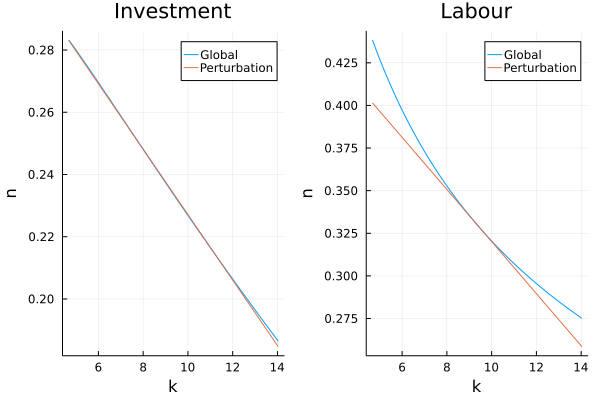

In [143]:
using Plots

p1 = plot(tab_global[V=:k],tab_global[V=:i],label = "Global", title = "Investment", xlabel = "k", ylabel = "n")
plot!(p1,tab_pert[V=:k],tab_pert[V=:i],label = "Perturbation")

p2 = plot(tab_global[V=:k],tab_global[V=:n],label = "Global", title = "Labour", xlabel = "k", ylabel = "n")
plot!(p2,tab_pert[V=:k],tab_pert[V=:n],label = "Perturbation")

plot(p1,p2,layout = (1,2))


It would seem, according to this, that second order perturbation does very well for the RBC model. We will revisit this issue more rigorously when we explore the deviations from the model's arbitrage section equations.
Let us repeat the calculation of investment decisions for various values of the depreciation rate, $\delta$. Note that this is a comparative statics exercise, even though the models compared are dynamic.

[0.000256]
[0.000256]


[0.000256]
[0.000256]
[0.000256]
[0.000256]


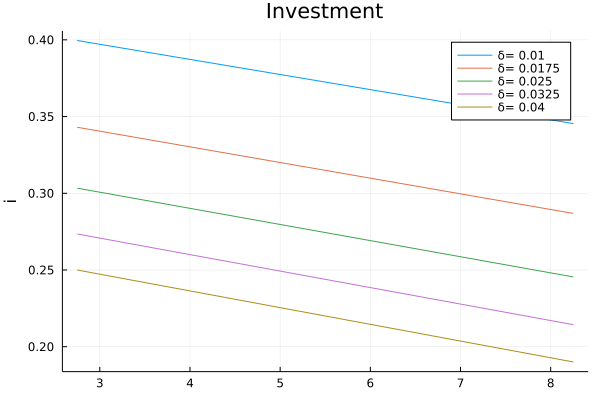

In [191]:
original_delta = model.calibration.flat[:delta] 

drs = []
delta_values = LinRange(0.01, 0.04,5)
for val in delta_values
    set_calibration!(model,:delta,val)
    push!(drs,perturb(model).dr)
end

p = plot()
for (j,dr) in enumerate(drs)
    sim = tabulate(model, dr,:k)
    plot!(p,sim[:k],sim[:i],label="δ= $(delta_values[j])", ylabel="i", title = "Investment")
end

set_calibration!(model,:delta,original_delta)

p


We find that more durable capital leads to higher steady state investment and slows the rate of convergence for capital (the slopes are roughly the same, which implies that relative to steady state capital investment responds stronger at higher $\delta$; this is in addition to the direct effect of depreciation).
# Use the model to simulate
We will use the deterministic steady-state as a starting point.

In [214]:
s0 = model.calibration[:states]
print("$(model.symbols[:states]) = $(s0)")

[:k] = [5.500544318810716]

We also get the covariance matrix just in case. This is a one shock model so all we have is the variance of $e_z$.

In [218]:
sigma2_ez = model.exogenous.Sigma
sigma2_ez

1×1 Matrix{Float64}:
 0.000256

Impulse response functions
Consider a 10% shock to productivity.

In [222]:
s1 = s0
s1[1] *= 1.1
print("$(model.symbols[:states]) = $(s1)")

[:k] = [7.321224488337066]

The simulate function is used both to trace impulse response functions and to compute stochastic simulations. Choosing n_exp>=1, will result in that many "stochastic" simulations. With n_exp = 0, we get one single simulation without any stochastic shock (see the source for the simulate function). The output is a panda table of size $H \times n_v$ where $n_v$ is the number of variables in the model and $H$ the number of dates.

In [224]:
dr = dr_pert.dr
simulate(model, dr, N=10, T=40)

3-dimensional AxisArray{Float64,3,...} with axes:
    :N, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    :V, [:z, :k, :n, :i, :y, :c, :rk, :w]
    :T, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
And data, a 10×8×40 Array{Float64, 3}:
[:, :, 1] =
 0.0  7.32122  0.361078  0.255263  0.974777  0.719514  0.0439375  1.80875
 0.0  7.32122  0.361078  0.255263  0.974777  0.719514  0.0439375  1.80875
 0.0  7.32122  0.361078  0.255263  0.974777  0.719514  0.0439375  1.80875
 0.0  7.32122  0.361078  0.255263  0.974777  0.719514  0.0439375  1.80875
 0.0  7.32122  0.361078  0.255263  0.974777  0.719514  0.0439375  1.80875
 0.0  7.32122  0.361078  0.255263  0.974777  0.719514  0.0439375  1.80875
 0.0  7.32122  0.361078  0.255263  0.974777  0.719514  0.0439375  1.80875
 0.0  7.32122  0.361078  0.255263  0.974777  0.719514  0.0439375  1.80875
 0.0  7.32122  0.361078  0.255263  0.974777  0.719514  0.0439375  1.80875
 0.0  7.32122  0.361078  0.255263  0.974777  0.719514  0.0439375  1.

In [233]:
m0 = model.calibration[:exogenous]

1-element Vector{Float64}:
 0.0

In [234]:
s0 = model.calibration[:states]

1-element Vector{Float64}:
 7.321224488337066

In [237]:
eval_ms(dr_global.dr,m0, s0)

UndefVarError: UndefVarError: eval_ms not defined

In [240]:
irf = response(model, dr_global.dr, :e_z)

BoundsError: BoundsError: attempt to access 1-element Vector{Float64} at index [0]

Let us plot the response of consumption and investment.

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(221)
plt.plot(irf.sel(V='z'))
plt.title('Productivity')
plt.grid()
plt.subplot(222)
plt.plot(irf.sel(V='i'))
plt.title('Investment')
plt.grid()
plt.subplot(223)
plt.plot(irf.sel(V='n'))
plt.grid()
plt.title('Labour')
plt.subplot(224)
plt.plot(irf.sel(V='c'))
plt.title('Consumption')
plt.grid()
plt.tight_layout()

Note that the plotting is made using the wonderful matplotlib library. Read the online tutorials to learn how to customize the plots to your needs (e.g., using latex in annotations). If instead you would like to produce charts in Matlab, you can easily export the impulse response functions, or any other matrix, to a .mat file.

In [ ]:
# it is also possible (and fun) to use the graph visualization altair lib instead: --> à la rigueur plotly
# it is not part of dolo dependencies. To install `conda install -c conda-forge altair`
import altair as alt
df = irf.drop('N').to_pandas().reset_index() # convert to flat database
base = alt.Chart(df).mark_line()
ch1 = base.encode(x='T', y='z')
ch2 = base.encode(x='T', y='i')
ch3 = base.encode(x='T', y='n')
ch4 = base.encode(x='T', y='c')
(ch1|ch2)& \
(ch3|ch4)

In [ ]:
irf_array = np.array( irf )
import scipy.io
scipy.io.savemat("export.mat", {'table': irf_array} )

Stochastic simulations
Now we run 1000 random simulations. The result is an array of size $T\times N \times n_v$ where
$T$ the number of dates
$N$ the number of simulations
$n_v$ is the number of variables

In [243]:
sim = simulate(model, dr_global.dr, N=1000, T=40 )
print(size(sim))

(1000, 8, 40)

We plot the responses of consumption, investment and labour to the stochastic path of productivity.

In [ ]:
plt.figure(figsize=(8,4))
for i in range(1000):
    plt.subplot(221)
    plt.plot(sim.sel(N=i,V='z'), color='red', alpha=0.1)
    plt.subplot(222)
    plt.plot(sim.sel(N=i,V='i'), color='red', alpha=0.1)
    plt.subplot(223)
    plt.plot(sim.sel(N=i,V='n'), color='red', alpha=0.1)
    plt.subplot(224)
    plt.plot(sim.sel(N=i,V='c'), color='red', alpha=0.1)

plt.subplot(221)
plt.title('Productivity')
plt.subplot(222)
plt.title('Investment')
plt.subplot(223)
plt.title('Labour')
plt.subplot(224)
plt.title('Consumption')

plt.tight_layout()

We find that while the distribution of investment and labour converges quickly to the ergodic distribution, that of consumption takes noticeably longer. This is indicative of higher persistence in consumption, which in turn could be explained by permanent income considerations.


# Descriptive statistics
A common way to evaluate the success of the RBC model is in its ability to mimic patterns in the descriptive statistics of the real economy. Let us compute some of these descriptive statistics from our sample of stochastic simulations. First we compute growth rates:

In [245]:
dsim = sim / sim.shift(T=1)

UndefVarError: UndefVarError: shift not defined

Then we compute the volatility of growth rates for each simulation:

In [246]:
volat = dsim.std(axis=1)
print(volat.shape)

UndefVarError: UndefVarError: dsim not defined

In [ ]:
volat

Then we compute the mean and a confidence interval for each variable. In the generated table the first column contains the standard deviations of growth rates. The second and third columns contain the lower and upper bounds of the 95% confidence intervals, respectively.

In [ ]:
table = np.column_stack([
    volat.mean(axis=0),
    volat.mean(axis=0)-1.96*volat.std(axis=0),
    volat.mean(axis=0)+1.96*volat.std(axis=0)  ])
table

We can use the pandas library to present the results in a nice table.

In [ ]:
import pandas
df = pandas.DataFrame(table, index=sim.V, 
                      columns=['Growth rate std.',
                               'Lower 95% bound',
                               'Upper 95% bound' ])
pandas.set_option('precision', 4)
df

# Error measures
It is always important to get a handle on the accuracy of the solution. The omega function computes and aggregates the errors for the model's arbitrage section equations. For the RBC model these are the investment demand and labor supply equations. For each equation it reports the maximum error over the domain and the mean error using ergodic distribution weights (see the source for the omega function).

In [ ]:
from dolo.algos.accuracy import omega

print("Perturbation solution")
err_pert = omega(model, dr_pert)
err_pert

In [ ]:
print("Global solution")
err_global=omega(model, dr_global)
err_global

The result of omega is a subclass of dict. omega fills that dict with some useful information that the default print does not reveal:

In [ ]:
err_pert.keys()

In particular the domain field contains information, like bounds and shape, that we can use to plot the spatial pattern of errors.

In [ ]:
a = err_pert['domain'].a
b = err_pert['domain'].b
orders = err_pert['domain'].orders
errors = concatenate((err_pert['errors'].reshape( orders.tolist()+[-1] ),
                      err_global['errors'].reshape( orders.tolist()+[-1] )),
                     2)

figure(figsize=(8,6))

titles=["Investment demand pertubation errors",
        "Labor supply pertubation errors",
        "Investment demand global errors",
        "Labor supply global errors"]

for i in range(4):

    subplot(2,2,i+1)
    imgplot = imshow(errors[:,:,i], origin='lower', 
                     extent=( a[0], b[0], a[1], b[1]), aspect='auto')
    imgplot.set_clim(0,3e-4)
    colorbar()
    xlabel('z')
    ylabel('k')
    title(titles[i])

tight_layout()